In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('mtcars.csv')

In [4]:
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [5]:
df.shape

(32, 12)

In [6]:
import seaborn as sns
sns.boxplot(df.model, df.mpg)

In [7]:
## Always a new model is getting added to our dataset. So, even if we are dropping model, it won't effect us much.
df.columns

Index(['model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')

In [8]:
df = df.drop('model',axis = 1)

In [9]:
print(df.isnull().sum())

mpg     0
cyl     0
disp    0
hp      0
drat    0
wt      0
qsec    0
vs      0
am      0
gear    0
carb    0
dtype: int64


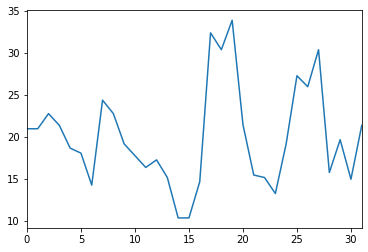

In [10]:
df['mpg'].plot()

In [11]:
df['mpg'].describe()

count    32.000000
mean     20.090625
std       6.026948
min      10.400000
25%      15.425000
50%      19.200000
75%      22.800000
max      33.900000
Name: mpg, dtype: float64

In [12]:
## Outlier calculation , Q3+1.5IQR and Q1 + 1.5IQR 
Upper_limit = 22.8 + 1.5 * (22.8-15.42)
Lower_limit = 15.42 - 1.5 * (22.8-15.42)
print('Upper_limit :', Upper_limit)
print('Lower_limit :', Lower_limit)

Upper_limit : 33.870000000000005
Lower_limit : 4.35


In [13]:
df1 = df[df['mpg']>33.8]
print(df1.shape)
df2 = df[df['mpg']<4.35]
df2.shape

(1, 11)


(0, 11)

In [14]:
## No or very less outliers So, no need to focus on outliers.

In [15]:
df.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


In [16]:
## Raw linear regression model
X = df.drop('mpg', axis=1)
y= df['mpg']
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(X, y)}')

Coefficients: [-0.11144048  0.01333524 -0.02148212  0.78711097 -3.71530393  0.82104075
  0.31776281  2.52022689  0.65541302 -0.19941925]
Intercept: 12.30337415599627
R^2 score: 0.8690157644777647


In [17]:
## For raw model let's check for overfitting and underfitting

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(22, 10)
(10, 10)
(10,)


In [19]:
lin_reg = LinearRegression()
model = lin_reg.fit(X_train,y_train)
print(f'R^2 score for train: {lin_reg.score(X_train, y_train)}')

y_pred = model.predict(X_test)
lin_reg.fit(X_test,y_pred)
print(f'R^2 score for test: {lin_reg.score(X_train, y_train)}')

R^2 score for train: 0.918075736168842
R^2 score for test: 0.8594002315153378


## Assumptions For linear Regression

In [20]:
## Raw OLS Model

In [21]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     13.93
Date:                Wed, 14 Aug 2019   Prob (F-statistic):           3.79e-07
Time:                        07:16:10   Log-Likelihood:                -69.855
No. Observations:                  32   AIC:                             161.7
Df Residuals:                      21   BIC:                             177.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3034     18.718      0.657      0.518     -26.623      51.229
cyl           -0.1114      1.045     -0.107      0.916      -2.285       2.062
disp           0.0133      0.018      0.747      0.463      -0.024       0.050
hp            -0.0215      0.022     -0.987      0.335      -0.067       0.024
drat           0.7871      1.635      0.481      0.635      -2.614       4.188
wt            -3.7153      1.894     -1.961      0.063      -7.655       0.224
qsec           0.8210      0.731      1.123      0.274      -0.699       2.341
vs             0.3178      2.105      0.151      0.881      -4.059       4.694
am             2.5202      2.057      1.225      0.234      -1.757       6.797
gear           0.6554      1.493      0.439      0.665      -2.450       3.761
carb          -0.1994      0.829     -0.241      0.812      -1.923       1.524
==============================================================================
Omnibus:                        1.907   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.385   Jarque-Bera (JB):                1.747
Skew:                           0.521   Prob(JB):                        0.418
Kurtosis:                       2.526   Cond. No.                     1.22e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Assumption 1- No autocorrelation

In [27]:
df.shape

(32, 11)

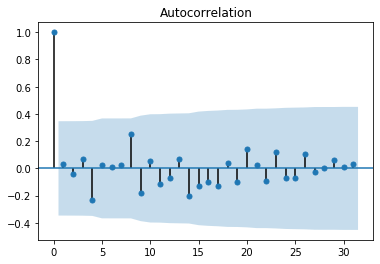

In [28]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(lin_reg.resid, lags=31 , alpha=0.05)
acf.show()

##### Assumption 2- Normality of Residuals

In [29]:
from scipy import stats
print(stats.jarque_bera(lin_reg.resid))

(1.7466576018547588, 0.4175592615519146)


##### Asssumption 3 - Linearity of residuals
Here we have 2 options. Either we can plot the observed values Vs predicted values and plot the Residual Vs predicted values and see the linearity of residuals.
OR
We can go for rainbow test. Let's look both of them one by one.

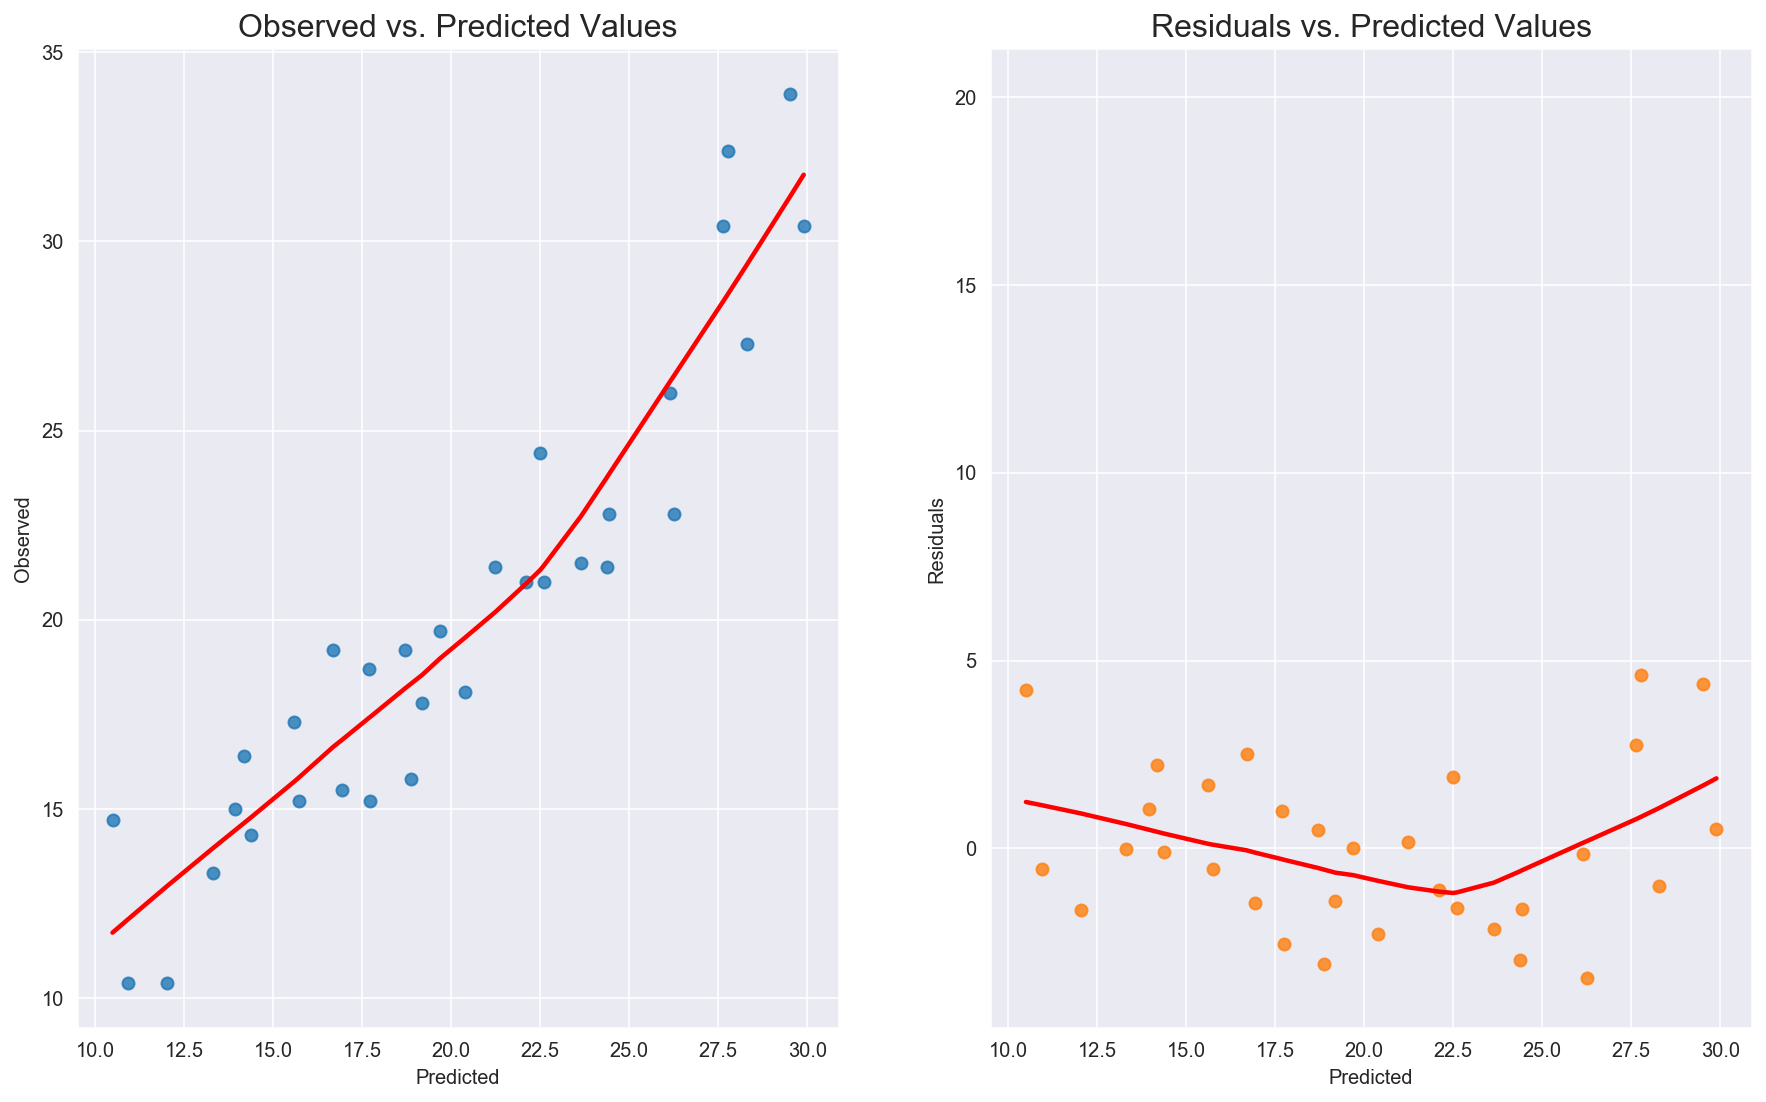

In [100]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(lin_reg, y)  

#### Rainbow test 

In [101]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res=lin_reg, frac=0.5)

(3.8577111479531574, 0.0711971203895364)

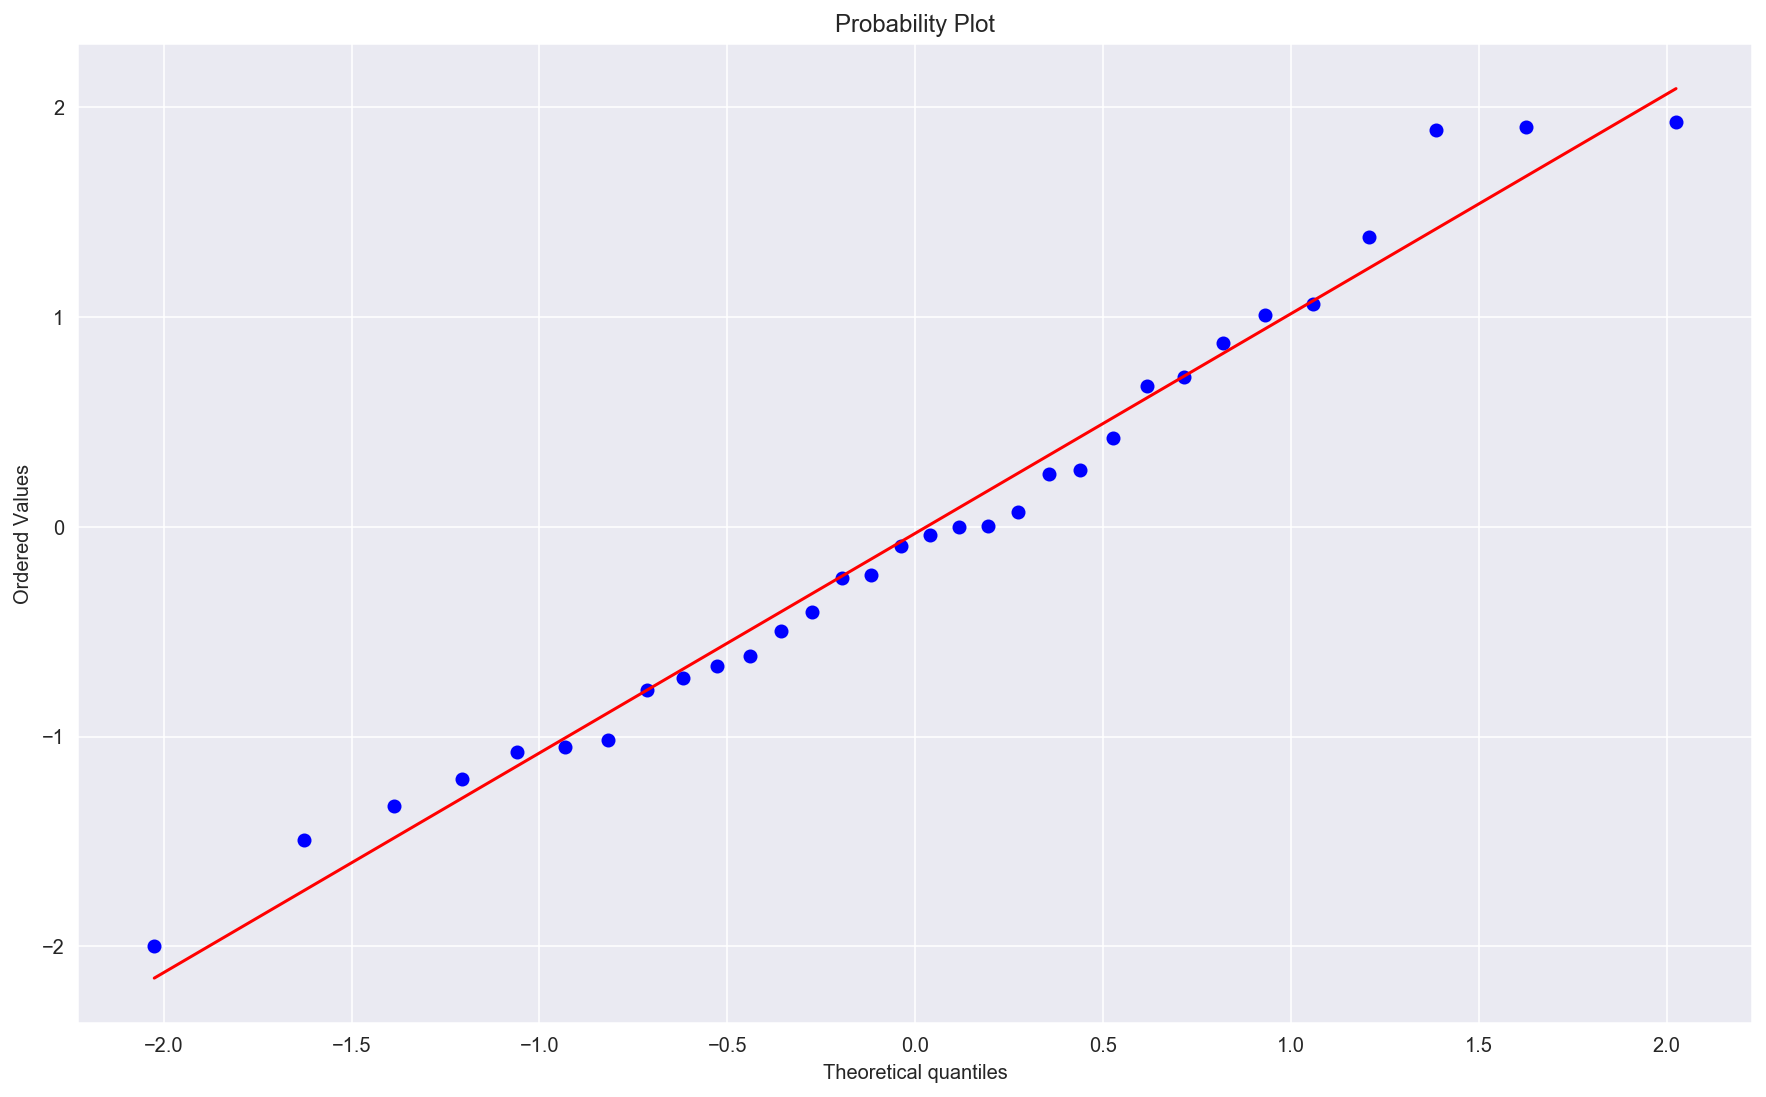

In [102]:
import scipy.stats as stats
import pylab
from statsmodels.graphics.gofplots import ProbPlot
st_residual = lin_reg.get_influence().resid_studentized_internal
stats.probplot(st_residual, dist="norm", plot = pylab)
plt.show()

    EXPECTATION : THE MEAN VALUE OF THE RESIDUALS SHOULD BE ZERO.
    LET's CHECK

In [103]:
lin_reg.resid.mean()

3.689826222341708e-13

Very much close to zero. 3.6 * 10^(-13)

So, linearity is present.

##### Assumption 4 -  Homoscedasticity_test(using goldfeld test) OR (Beusch-Wagon Test)
Homoscedacity :: If the residuals are symmetrically distributed across the trend , then it is called as homoscedacious.
Heteroscedacity :: If the residuals are not symmetric across the trend, then it is called as heteroscedacious. In this the residuals can form an arrow shape or any other non symmetrical shape.

##### Goldfeld Test

[('F statistic', 28.863993040890303), ('p-value', 0.001074898144721436)]

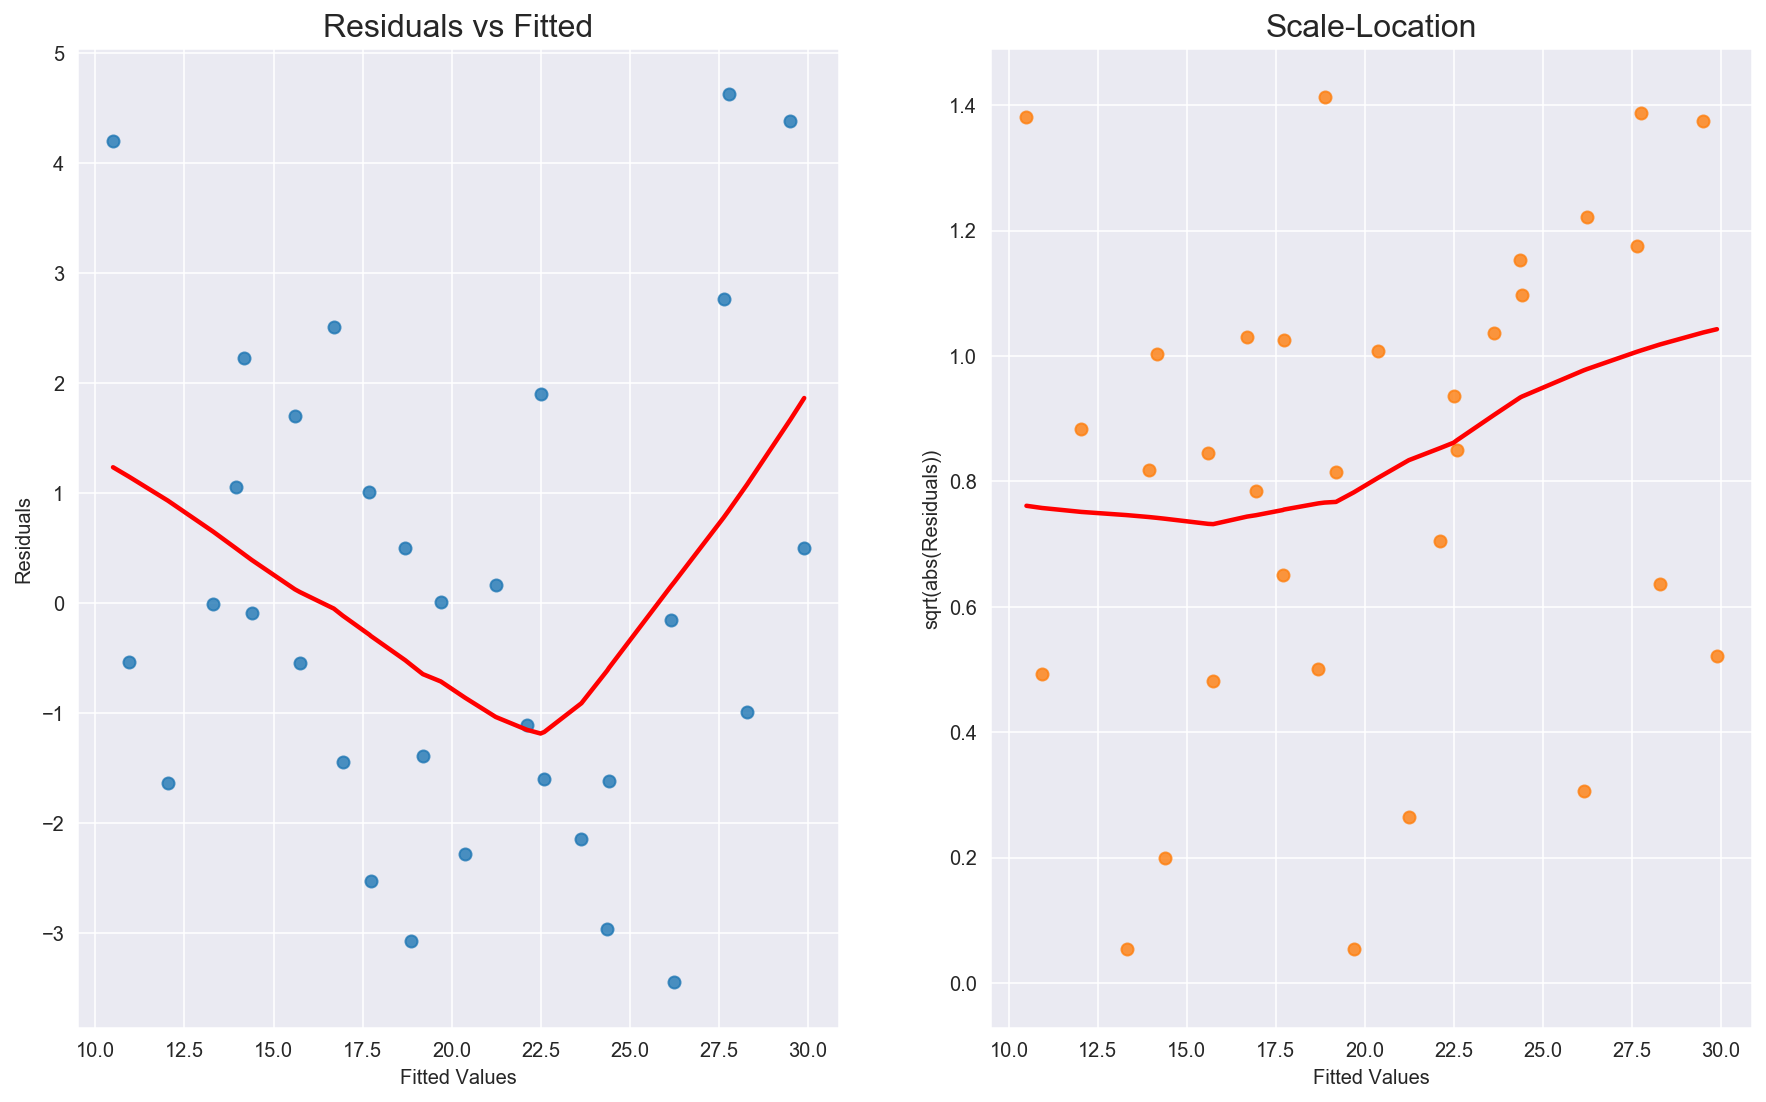

In [104]:
from statsmodels.compat import lzip
import numpy as np
from statsmodels.compat import lzip
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

model = lin_reg
fitted_vals = model.predict()
resids = model.resid
resids_standardized = model.get_influence().resid_studentized_internal
fig, ax = plt.subplots(1,2)

sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Residuals vs Fitted', fontsize=16)
ax[0].set(xlabel='Fitted Values', ylabel='Residuals')
sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Scale-Location', fontsize=16)
ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
lzip(name, test)

##### Assumption 5- NO  MULTI COLLINEARITY

In [105]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
vif,15.373833,21.620241,9.832037,3.37462,15.164887,7.527958,4.965873,4.648487,5.357452,7.908747


So, multicollinearity exists.

Note : This vif column has be built with the help of X_constant and not the X_values.
    Because we built our model by adding Constant.

In [106]:
df.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


In [107]:
## 
X = df[['drat','vs','am','gear','carb','qsec']]
y = df['mpg']
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(X, y)}')

Coefficients: [ 2.10853114  1.50006443  4.06713222  1.70150963 -1.68311369  0.45165825]
Intercept: 0.5965156639904023
R^2 score: 0.8173146698607447


In [108]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     18.64
Date:                Tue, 13 Aug 2019   Prob (F-statistic):           3.99e-08
Time:                        13:19:57   Log-Likelihood:                -75.178
No. Observations:                  32   AIC:                             164.4
Df Residuals:                      25   BIC:                             174.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5965     11.520      0.052      0.959     -23.129      24.322
drat           2.1085      1.626      1.296      0.207      -1.241       5.458
vs             1.5001      1.990      0.754      0.458      -2.599       5.599
am             4.0671      2.039      1.994      0.057      -0.133       8.267
gear           1.7015      1.454      1.170      0.253      -1.293       4.696
carb          -1.6831      0.500     -3.367      0.002      -2.713      -0.654
qsec           0.4517      0.559      0.809      0.426      -0.699       1.602
==============================================================================
Omnibus:                        2.402   Durbin-Watson:                   2.163
Prob(Omnibus):                  0.301   Jarque-Bera (JB):                1.734
Skew:                          -0.570   Prob(JB):                        0.420
Kurtosis:                       2.994   Cond. No.                         433.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Finally let's check for overfit and underfit condition

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(22, 6)
(10, 6)
(10,)


In [112]:
lin_reg = LinearRegression()
model = lin_reg.fit(X_train,y_train)
print(f'R^2 score for train: {lin_reg.score(X_train, y_train)}')

y_pred = model.predict(X_test)
lin_reg.fit(X_test,y_pred)
print(f'R^2 score for test: {lin_reg.score(X_train, y_train)}')

R^2 score for train: 0.8720784659914048
R^2 score for test: 0.8720784659914049


## Polynomial Features

In [113]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures()

# Transformed the Input Variabes for a better modelling
x = pf.fit_transform(X)

# Building the Model
ins_model = sm.OLS(y,x).fit() # Fitting the Model on the Data
ins_pred = ins_model.predict(x) # Making Prediction on X values 
st_residual = ins_model.get_influence().resid_studentized_internal

# Find the Rsquare
print('R_squared value : ', ins_model.rsquared * 100)
print('Adj_R_squared value : ', ins_model.rsquared_adj * 100)

R_squared value :  97.97656283154866
Adj_R_squared value :  91.03906396828694


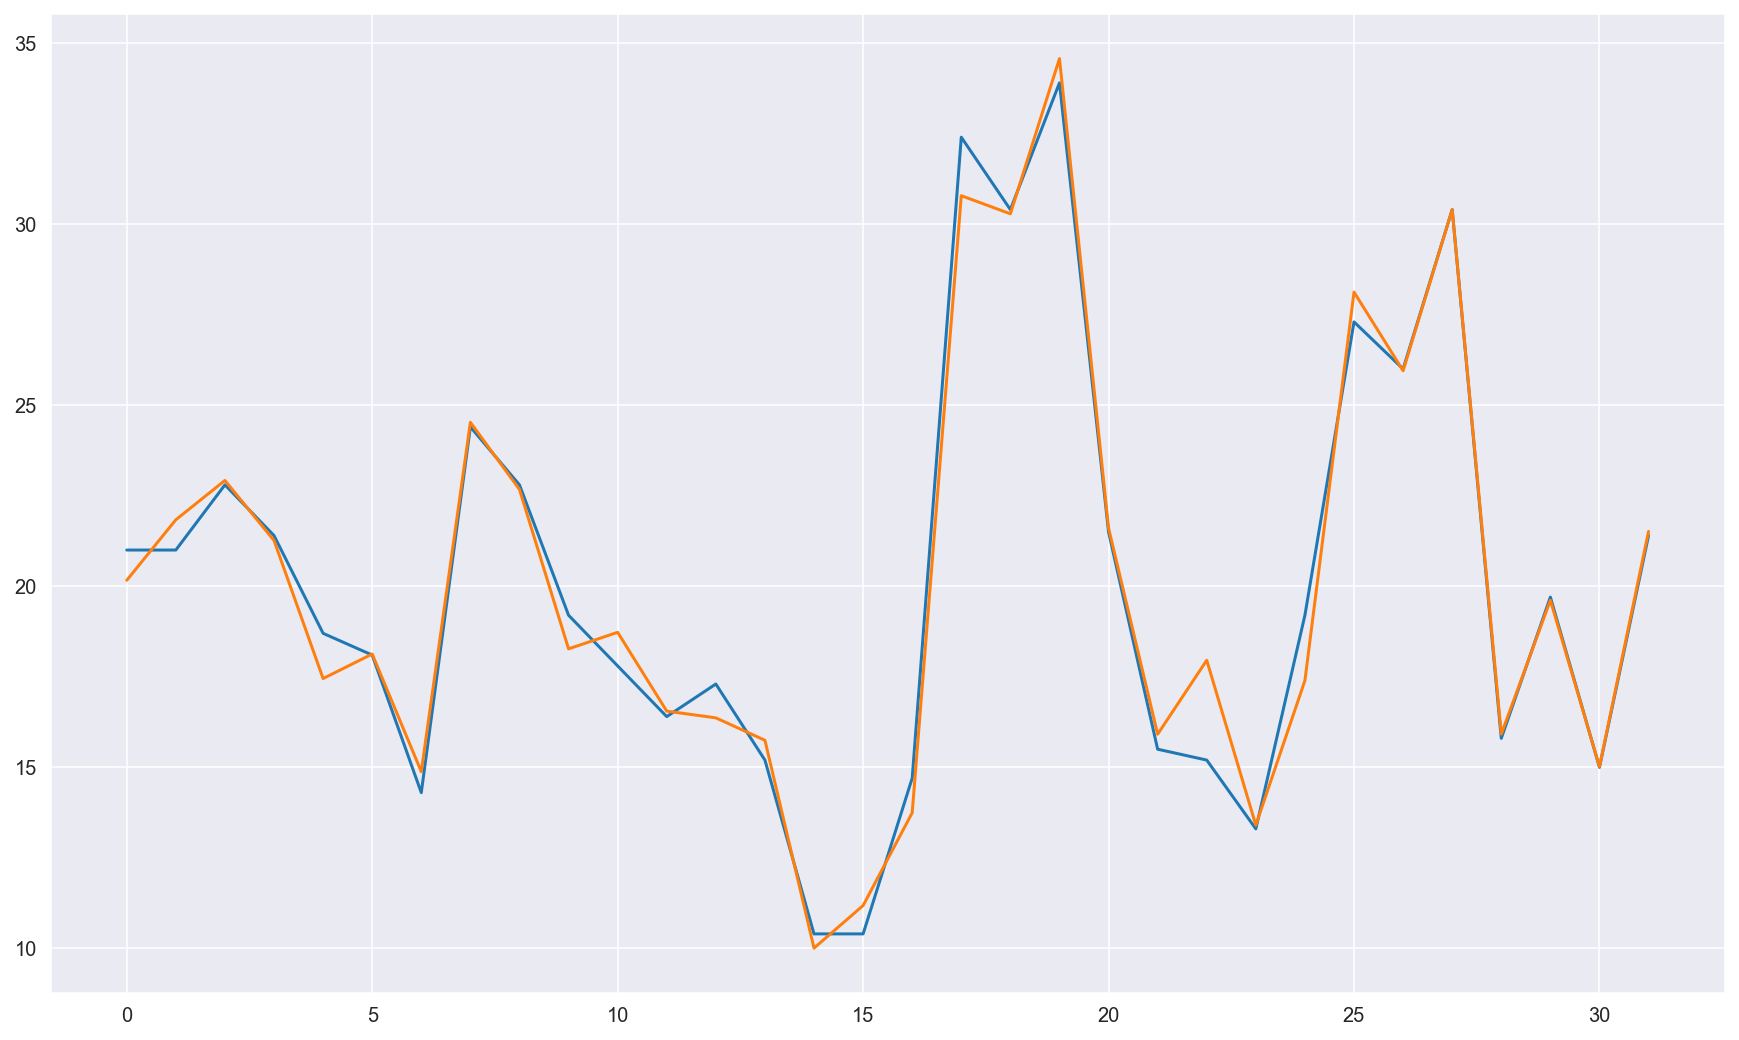

In [114]:
import matplotlib.pyplot as plt
plt.plot(y)
plt.plot(ins_pred)

In [115]:
ins_pred

array([20.16424578, 21.83575422, 22.92194816, 21.26331432, 17.45165352,
       18.12860509, 14.87977741, 24.52577464, 22.67422536, 18.27200219,
       18.72799781, 16.5516825 , 16.36589264, 15.74637828, 10.00720629,
       11.183262  , 13.74454618, 30.78474302, 30.2843926 , 34.57084271,
       21.60808059, 15.91334876, 17.95651026, 13.40323141, 17.39651075,
       28.12246611, 25.95135033, 30.4       , 15.91644317, 19.61306265,
       15.01914384, 21.5156074 ])

## Let's calculate the metrics

In [118]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('mean_absolute_error : ' , mean_absolute_error(y, ins_pred))
print('mean_square_error : ', mean_squared_error(y, ins_pred))
print('rmse value : ', np.sqrt(mean_squared_error(y, ins_pred)))

mean_absolute_error :  0.5766783980541023
mean_square_error :  0.712026791442999
rmse value :  0.8438167996923259


In [121]:
import numpy as np

def mean_absolute_percentage_error(y , ins_pred):
    y_true, y_pred = np.array(y), np.array(ins_pred)
    return np.mean(np.abs((y_true - y_pred))*100)
mean_absolute_percentage_error(y , ins_pred)


57.667839805410225